# Практична робота 4

Загальні завдання для всіх варіантів:

1. Завантажте навчальний набір даних. Сформуйте навчальну та тестову
підмножини зображень. Самостійно визначте оптимальний розмір
зображень та розмір батчу.
2. Виведіть перші 9 зображень із сформованої навчальної підмножини.
3. Перевірте, чи правильно сформовано імена класів.
4. Сформуйте множину тестових даних. Перевірте правильність імен класів
на тестовій множині.
5. Створіть та навчіть згорткову нейронну мережу для розпізнавання двох
класів об’єктів на зображеннях. Побудуйте графік навчання.
6. Проведіть оцінку якості роботи навченої мережі на тестових даних.
7. Застосуйте навчену мережу для класифікації довільних зображень, які
імпортуються в програму з жорсткого диску ПК.

Варіант 12

Набір даних: літ аки (planes.zip).
Опис даних: В наборі містяться зображення різних типів літаків. Необхідно
навчити нейронну мережу визнач


In [ ]:
# 1. Імпорт бібліотек та налаштування конфігурації
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

BATCH_SIZE = 32
IMAGE_SIZE = (180, 180)

# BASE_DIR = 'C:/HomeWork/bog/pw4/'
BASE_DIR = ''

TRAIN_DIR = BASE_DIR+'planes/train'
TEST_DIR = BASE_DIR+'planes/test'

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.10.1


In [ ]:
# 2 Завантаження даних
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Знайдені класи:", class_names)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

AUTOTUNE = tf.data.AUTOTUNE #Оптимізація

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2996 files belonging to 2 classes.
Using 2397 files for training.
Знайдені класи: ['fighter-jet', 'passenger-plane']
Found 2996 files belonging to 2 classes.
Using 599 files for validation.
Found 262 files belonging to 2 classes.


Знайдені класи: ['fighter-jet', 'passenger-plane']


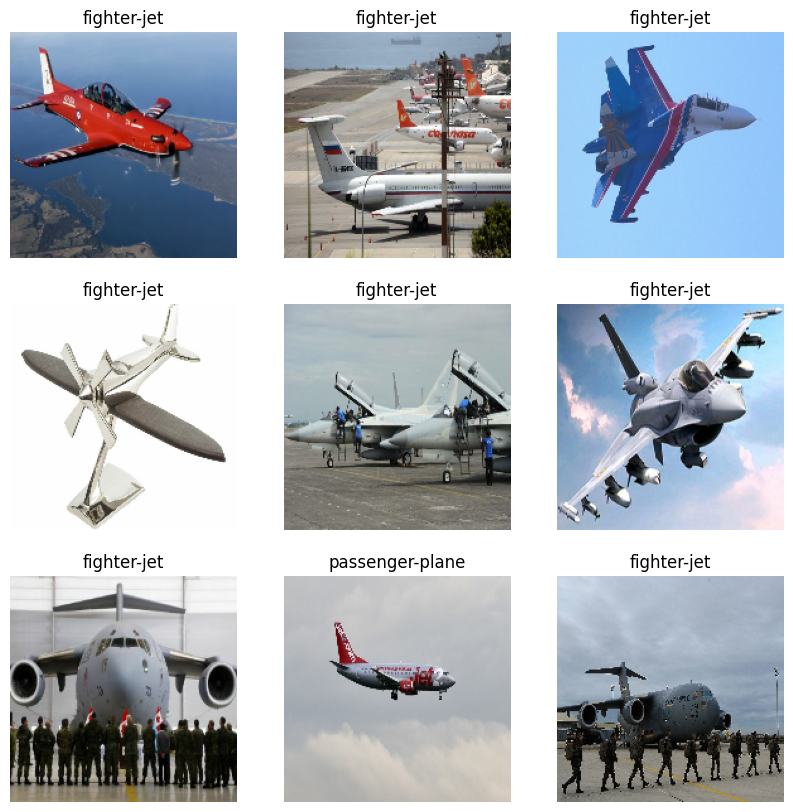

In [ ]:
# 3. Візуалізація та перевірка класів
print("Знайдені класи:", class_names)

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        
        plt.axis("off")

plt.show()

In [ ]:
# 4. Створення архітектури CNN
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

In [ ]:
1/0 #Щоб не запустити навчання випадково

Epoch 1/15
75/75 [==============================] - 34s 449ms/step - loss: 2.4409 - accuracy: 0.5599 - val_loss: 0.8183 - val_accuracy: 0.5676
Epoch 2/15
75/75 [==============================] - 34s 455ms/step - loss: 0.7280 - accuracy: 0.5707 - val_loss: 0.6917 - val_accuracy: 0.5676
Epoch 3/15
75/75 [==============================] - 35s 461ms/step - loss: 0.6894 - accuracy: 0.5791 - val_loss: 0.6787 - val_accuracy: 0.6127
Epoch 4/15
75/75 [==============================] - 35s 468ms/step - loss: 0.6806 - accuracy: 0.6020 - val_loss: 0.6886 - val_accuracy: 0.5993
Epoch 5/15
75/75 [==============================] - 35s 467ms/step - loss: 0.6639 - accuracy: 0.6341 - val_loss: 0.6565 - val_accuracy: 0.6477
Epoch 6/15
75/75 [==============================] - 37s 491ms/step - loss: 0.6558 - accuracy: 0.6454 - val_loss: 0.6561 - val_accuracy: 0.6377
Epoch 7/15
75/75 [==============================] - 36s 476ms/step - loss: 0.6645 - accuracy: 0.6408 - val_loss: 0.6581 - val_accuracy: 0.6644

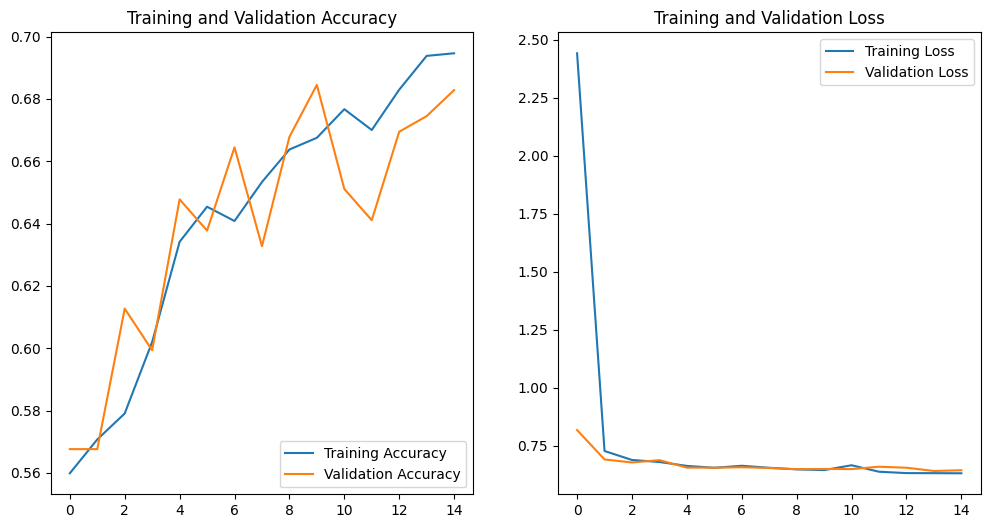

In [ ]:
# 5. Навчання та графіки 
epochs = 15 
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Збереження навченої моделі на диск
model.save('cnn_planes_model.keras')
print(f"Модель успішно збережено до: cnn_planes_model.keras")

Модель успішно збережено до: cnn_planes_model.keras


In [28]:
# Завантаження моделі з диску
reloaded_model = tf.keras.models.load_model('cnn_planes_model.keras')
if not 'model' in globals(): 
    model = reloaded_model
    print(f"Модель успішно завантажено.")

Модель успішно завантажено.


In [ ]:
# 6. Оцінка якості
print("Оцінка на тестовому наборі даних:")
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nТочність на тестових даних: {test_acc * 100:.2f}%")

Оцінка на тестовому наборі даних:
9/9 [==============================] - 12s 1s/step - loss: 0.6486 - accuracy: 0.6985

Точність на тестових даних: 69.85%


In [30]:
# 7. Перевірка на власному зображенні
def predict_image(img_path):
    try:
        img = tf.keras.utils.load_img(img_path, target_size=IMAGE_SIZE)
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)
        
        score = float(predictions[0][0]) 
        
        predicted_class = class_names[1] if score > 0.5 else class_names[0]
        confidence = 100 * score if score > 0.5 else 100 * (1 - score)

        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{predicted_class} ({confidence:.2f}%)")
        plt.show()
    except Exception as e:
        print(f"Помилка завантаження файлу: {e}")

1/1 [==============================] - 1s 868ms/step


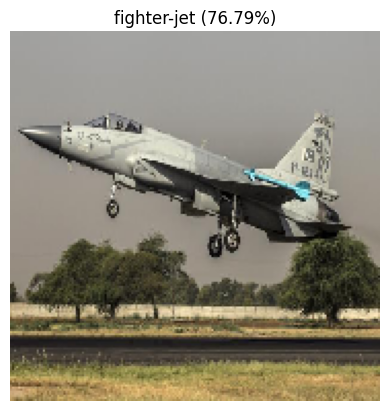

In [31]:
predict_image(BASE_DIR+r'planes/test/fighter-jet/00001829.jpg')

1/1 [==============================] - 0s 212ms/step


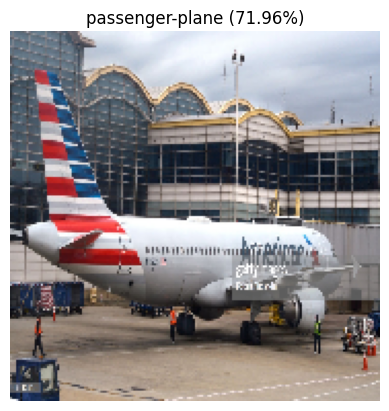

In [33]:
predict_image(BASE_DIR+r'planes/test/passenger-plane/00001420.jpg')